In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

In [2]:
data=pd.read_csv(r'Wine.csv')

In [3]:
scaler=MinMaxScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)
X=scaled_data[:,0:13]
Y=data['quality'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=23)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [4]:
clf_KNN=KNeighborsClassifier(algorithm='auto', leaf_size=30
                             , metric='minkowski',metric_params=None
                             , n_jobs=-1, n_neighbors=1
                             , p=2,weights='uniform')
clf_SVC=SVC(C=40, cache_size=200, class_weight=None, coef0=0.0
            ,decision_function_shape='ovr', degree=3, gamma=140, kernel='rbf'
            ,max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=0)
clf_LR=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True
                          ,intercept_scaling=1, max_iter=100, multi_class='warn'
                          ,n_jobs=-1, penalty='l1', random_state=None
                          , solver='warn',tol=0.0001, verbose=0, warm_start=False)
clf_Tree=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None
                                ,max_features=None, max_leaf_nodes=None,min_impurity_decrease=1e-05
                                , min_impurity_split=None,min_samples_leaf=1, min_samples_split=2
                                ,min_weight_fraction_leaf=0.0, presort=False, random_state=None,splitter='best')
clf_GB=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                  learning_rate=0.1, loss='deviance', max_depth=3,
                                  max_features=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=800,
                                  n_iter_no_change=None, presort='auto', random_state=None,
                                  subsample=1.0, tol=0.0001, validation_fraction=0.1,
                                  verbose=0, warm_start=False)
clf_RF=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                              max_depth=None, max_features='log2', max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_impurity_split=None,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                              oob_score=False, random_state=None, verbose=0,
                              warm_start=False)
clf_Bagging=BaggingClassifier(base_estimator=None, bootstrap=True,
                              bootstrap_features=False, max_features=1.0, max_samples=1.0,
                              n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
                              verbose=0, warm_start=False)
clf_ExtraTrees=ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,
                                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                                    oob_score=False, random_state=None, verbose=0, warm_start=False)
clf_XGB=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                      colsample_bytree=0.6, gamma=0.1, learning_rate=0.1,
                      max_delta_step=0, max_depth=15, min_child_weight=1, min_weight=1,
                      missing=None, n_estimators=100, n_jobs=-1, nthread=None,
                      objective='multi:softprob', random_state=0, reg_alpha=0.01,
                      reg_lambda=5, scale_pos_weight=1, seed=None, silent=True,
                      subsample=0.9)

In [5]:
clf=[clf_KNN,clf_SVC,clf_LR,clf_Tree,clf_GB,clf_RF,clf_Bagging,clf_ExtraTrees,clf_XGB]
clf_names=['KNN','SVC','LR','Tree','GB','RF','Bagging','ExtraTrees','XGB']
accuracy = []
i=0
t=[]
for m in range(len(clf)):
    time_start = time.time()
    clf[i].fit(x_train,y_train)
    score = cross_val_score(clf[i],x_train,y_train, cv=5, scoring='accuracy',n_jobs=-1).mean()
    time_end = time.time()
    t.append(time_end-time_start)
    accuracy.append(score)
    i=i+1
result_frame=pd.DataFrame({'Model':clf_names,'Accuracy':accuracy,'Time':t})

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futu

In [6]:
result_frame

,Model,Accuracy,Time
0,KNN,0.586297,2.375631
1,SVC,0.618860,5.065210
2,LR,0.534404,1.059170
3,Tree,0.565426,0.089760
4,GB,0.631393,43.224946
5,RF,0.660395,6.089419
6,Bagging,0.651391,17.044663
7,ExtraTrees,0.666792,2.413758
8,XGB,0.662835,14.900555


In [7]:
time_start = time.time()
clf_stacking_op1=VotingClassifier(estimators=[('KNN',clf_KNN)
                                          ,('SVM',clf_SVC)
                                          ,('LogisticsR', clf_LR)
                                          ,('DecisionTree', clf_Tree)
                                          ,('GradientBoostingClassifier', clf_GB)
                                          ,('RandomForestClassifier', clf_RF)
                                          , ('BaggingClassifier', clf_Bagging)
                                          , ('ExtraTreesClassifier', clf_ExtraTrees)
                                          ,('Xgboost', clf_XGB)]
                                            ,voting='hard')
stacking_score_op1=cross_val_score(clf_stacking_op1,x_train,y_train, cv=5, scoring='accuracy',n_jobs=-1).mean()
time_end = time.time()
time_end-time_start

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


65.54790544509888

In [8]:
stacking_score_op1

0.6615099245941386

In [9]:
clf_stacking_op1.fit(x_train,y_train)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')), ('SVM', SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=...alpha=0.01,
       reg_lambda=5, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

Voting结果

In [10]:
y_pre_stacking=clf_stacking_op1.predict(x_test)

In [11]:
confusion_matrix(y_test, y_pre_stacking)

array([[  0,   1,   5,   3,   0,   0,   0],
       [  0,   7,  40,  22,   0,   0,   0],
       [  0,   2, 487, 161,   5,   0,   0],
       [  0,   0, 140, 669,  32,   1,   0],
       [  0,   0,   5, 165, 142,   4,   0],
       [  0,   0,   0,  27,  11,  18,   0],
       [  0,   0,   0,   1,   2,   0,   0]], dtype=int64)

In [12]:
accuracy_score(y_test, y_pre_stacking)

0.6784615384615384

In [13]:
cohen_kappa_score(y_test, y_pre_stacking)

0.49351677444771114

Random Forests结果

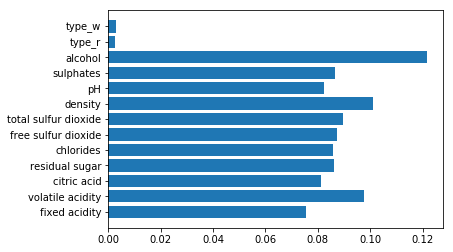

In [14]:
plt.barh(data.columns.values[:-1],clf_RF.feature_importances_)
plt.show()

In [15]:
y_pre_RF=clf_RF.predict(x_test)

In [16]:
confusion_matrix(y_test, y_pre_RF)

array([[  0,   1,   6,   2,   0,   0,   0],
       [  0,   8,  40,  21,   0,   0,   0],
       [  0,   3, 481, 165,   6,   0,   0],
       [  0,   0, 137, 663,  41,   1,   0],
       [  0,   0,   9, 153, 150,   4,   0],
       [  0,   0,   0,  23,  15,  18,   0],
       [  0,   0,   0,   1,   2,   0,   0]], dtype=int64)

In [18]:
accuracy_score(y_test, y_pre_RF)

0.676923076923077

In [17]:
cohen_kappa_score(y_test, y_pre_RF)

0.49368789330889085

Bagging结果

In [19]:
y_pre_Bagging=clf_Bagging.predict(x_test)

In [20]:
confusion_matrix(y_test, y_pre_Bagging)

array([[  0,   1,   6,   2,   0,   0,   0],
       [  0,   9,  43,  16,   1,   0,   0],
       [  0,   3, 485, 159,   8,   0,   0],
       [  0,   0, 141, 646,  51,   4,   0],
       [  0,   0,  16, 144, 151,   5,   0],
       [  0,   0,   0,  21,  17,  18,   0],
       [  0,   0,   0,   2,   1,   0,   0]], dtype=int64)

In [21]:
accuracy_score(y_test, y_pre_Bagging)

0.6712820512820513

In [22]:
cohen_kappa_score(y_test, y_pre_Bagging)

0.48804894611683936

ExtraTrees结果

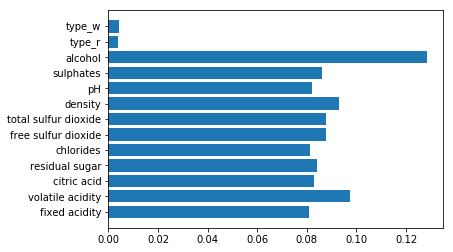

In [23]:
plt.barh(data.columns.values[:-1],clf_ExtraTrees.feature_importances_)
plt.show()

In [24]:
y_pre_ExtraTrees=clf_ExtraTrees.predict(x_test)

In [25]:
confusion_matrix(y_test, y_pre_ExtraTrees)

array([[  0,   1,   6,   2,   0,   0,   0],
       [  0,   9,  40,  20,   0,   0,   0],
       [  0,   2, 484, 164,   5,   0,   0],
       [  0,   0, 137, 672,  32,   1,   0],
       [  0,   0,   6, 169, 137,   4,   0],
       [  0,   0,   0,  26,  12,  18,   0],
       [  0,   0,   0,   1,   2,   0,   0]], dtype=int64)

In [26]:
accuracy_score(y_test, y_pre_ExtraTrees)

0.676923076923077

In [27]:
cohen_kappa_score(y_test, y_pre_ExtraTrees)

0.49081793663760787

XGBoost结果

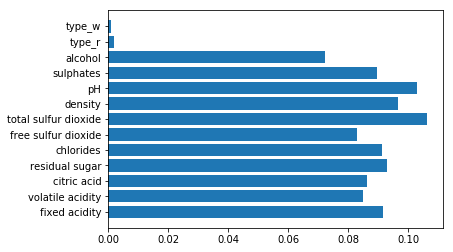

In [28]:
plt.barh(data.columns.values[:-1],clf_XGB.feature_importances_)
plt.show()

In [29]:
y_pre_XGB=clf_XGB.predict(x_test)

In [30]:
confusion_matrix(y_test, y_pre_XGB)

array([[  0,   1,   5,   3,   0,   0,   0],
       [  0,   7,  41,  21,   0,   0,   0],
       [  0,   2, 480, 167,   6,   0,   0],
       [  0,   2, 143, 653,  44,   0,   0],
       [  0,   0,   9, 153, 152,   2,   0],
       [  0,   0,   0,  21,  17,  18,   0],
       [  0,   0,   0,   0,   3,   0,   0]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pre_XGB)

0.6717948717948717

In [32]:
cohen_kappa_score(y_test, y_pre_XGB)

0.48624088880326244